# Predicting fuel efficiency (MPG) for using cars made from 1984 to 2017

## Introduction
The purpose of this notebook is to go through an example of data analysis. We will show how we can perform preprocessing/analysis tasks to gather more information about the data. Finally, we will apply and test machine learning algorithms on the processed data to analyze the performance of each algorithm and write our conclusion at the end.

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load data

In [33]:
cars = pd.read_csv('database.csv')
cars.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3186: DtypeWarning: Columns (7,16,62,64,65,67,68,78) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,...,Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2)
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0


In [34]:
cars.shape

(38113, 81)

**Note:** There are 81 columns so we will focus on columns related to MPG
We recieved a warning 
`/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3186: DtypeWarning: Columns (7,16,62,64,65,67,68,78) have mixed types.`

In [35]:
cars.iloc[:,[7,16,62,64,65,67,68,78]].head(3)

,Transmission Descriptor,Fuel Type 2,Start Stop Technology,Electric Motor,Manufacturer Code,Vehicle Charger,Alternate Charger,Range (FT2)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
cars.iloc[:,[7,16,62,64,65,67,68,78]].tail(3)

,Transmission Descriptor,Fuel Type 2,Start Stop Technology,Electric Motor,Manufacturer Code,Vehicle Charger,Alternate Charger,Range (FT2)
38110,NaN,NaN,Y,NaN,VVX,NaN,NaN,NaN
38111,NaN,Electricity,Y,34 and 65kW DCPM,VVX,NaN,NaN,14
38112,NaN,NaN,Y,NaN,VVX,NaN,NaN,NaN


We are looking to predict mpg so the only column we will pick from the above mixed columns is `	Transmission Descriptor` and add this to relevant columns.

In [37]:
rel_cols = ['Vehicle ID', 'Year', 'Make', 'Model', 'Class', 'Drive', 'Transmission',
            'Transmission Descriptor', 'Engine Index', 'Engine Descriptor',
           'Engine Cylinders', 'Engine Displacement', 'Turbocharger',
           'Supercharger', 'Fuel Type', 'Fuel Type 1', 'Fuel Type 2',
            'Combined MPG (FT1)', 'Combined MPG (FT2)']

cars = cars[rel_cols]
cars.shape

(38113, 19)

In [38]:
cars.head(3)

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Fuel Type 2,Combined MPG (FT1),Combined MPG (FT2)
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),6.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,20,0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,6.0,2.5,NaN,NaN,Regular,Regular Gasoline,NaN,20,0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),4.0,2.0,NaN,NaN,Regular,Regular Gasoline,NaN,21,0


In [39]:
cars.tail(3)

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Fuel Type 2,Combined MPG (FT1),Combined MPG (FT2)
38110,37548,2017,Volvo,XC90 AWD,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,53,SIDI,4.0,2.0,T,NaN,Premium,Premium Gasoline,NaN,23,0
38111,37703,2017,Volvo,XC90 AWD PHEV,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,54,SIDI; PHEV,4.0,2.0,T,S,Premium and Electricity,Premium Gasoline,Electricity,25,54
38112,37687,2017,Volvo,XC90 FWD,Standard Sport Utility Vehicle 2WD,Front-Wheel Drive,Automatic (S8),NaN,50,SIDI,4.0,2.0,T,NaN,Premium,Premium Gasoline,NaN,24,0


## Early Observations
- Multiple columns have some missing values
- Missing values for Fuel type 2 could correspond to whether it's an electric car
- There is a mix of numeric and categorical columns
- The MPG column is a integer value whereas Engine Cylinders and Engine Displacement are not. Doesn't make sense for Engine Cylinders to be a decimal value, will require further investigation
- Turbocharger and Supercharger only seem to have two values (missing or T/S)
- Possible duplication of vehicles (at least when looking at the columns of interest)

In [40]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38113 entries, 0 to 38112
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle ID               38113 non-null  int64  
 1   Year                     38113 non-null  int64  
 2   Make                     38113 non-null  object 
 3   Model                    38113 non-null  object 
 4   Class                    38113 non-null  object 
 5   Drive                    36924 non-null  object 
 6   Transmission             38102 non-null  object 
 7   Transmission Descriptor  15045 non-null  object 
 8   Engine Index             38113 non-null  int64  
 9   Engine Descriptor        22693 non-null  object 
 10  Engine Cylinders         37977 non-null  float64
 11  Engine Displacement      37979 non-null  float64
 12  Turbocharger             5239 non-null   object 
 13  Supercharger             693 non-null    object 
 14  Fuel Type             

In [41]:
cars.describe()

,Vehicle ID,Year,Engine Index,Engine Cylinders,Engine Displacement,Combined MPG (FT1),Combined MPG (FT2)
count,38113.000000,38113.000000,38113.000000,37977.000000,37979.000000,38113.000000,38113.00000
mean,19170.638496,2000.194527,8799.389001,5.736656,3.317583,20.216068,0.60688
std,11134.878665,10.464573,17781.058490,1.752254,1.361995,6.772655,4.21010
min,1.000000,1984.000000,0.000000,2.000000,0.000000,7.000000,0.00000
25%,9529.000000,1991.000000,0.000000,4.000000,2.200000,17.000000,0.00000
50%,19058.000000,2001.000000,212.000000,6.000000,3.000000,19.000000,0.00000
75%,28779.000000,2009.000000,4451.000000,6.000000,4.300000,23.000000,0.00000
max,38542.000000,2017.000000,69102.000000,16.000000,8.400000,136.000000,133.00000


We can safely ignore Vehicle ID and Engine Index values as these don't mean anything. As for Year we can confirm that the data is for the period 1984 and 2017.

All prior information about the data is an assumption until confirmed by the data

Looking at Engine Cylinders and MPG we may have an outlier that we have to deal with. Finally, in the Engine Displacement column we see a minimum of zero which may point to an error.

## Remove duplicates

In [42]:
id_cols = ['Make', 'Model', 'Class', 'Drive', 'Transmission',
            'Transmission Descriptor', 'Engine Descriptor',
           'Engine Cylinders', 'Engine Displacement', 'Turbocharger',
           'Supercharger', 'Fuel Type', 'Fuel Type 1', 'Fuel Type 2',
            'Combined MPG (FT1)', 'Combined MPG (FT2)']
cars_dedup = cars.drop_duplicates(subset=id_cols)
cars_dedup.shape

(23097, 19)

## Categorical Values
Summarize categorical values by looking at their counts.


In [43]:
cars['Make'].value_counts()


Chevrolet                      3810
Ford                           3155
Dodge                          2531
GMC                            2398
Toyota                         1937
                               ... 
London Coach Co Inc               1
Panos                             1
Volga Associated Automobile       1
Aurora Cars Ltd                   1
Lambda Control Systems            1
Name: Make, Length: 133, dtype: int64

`Make` and `Model` are very specific, meaning there are a lot of possible values. This makes it hard for any algorithm to extract information that is generally applicable. For example if a new car maker appears, how should the algorithm deal with that if it hasn't seen it before. Instead it's better to look at variables that do generalize.

In [44]:
cars['Class'].value_counts()

Compact Cars                          5508
Subcompact Cars                       4872
Midsize Cars                          4395
Standard Pickup Trucks                2354
Sport Utility Vehicle - 4WD           2082
Large Cars                            1891
Two Seaters                           1886
Sport Utility Vehicle - 2WD           1627
Small Station Wagons                  1499
Special Purpose Vehicles              1455
Minicompact Cars                      1260
Standard Pickup Trucks 2WD            1177
Vans                                  1141
Standard Pickup Trucks 4WD             986
Midsize-Large Station Wagons           656
Special Purpose Vehicle 2WD            613
Small Pickup Trucks                    538
Small Sport Utility Vehicle 4WD        526
Midsize Station Wagons                 523
Vans, Cargo Type                       438
Small Pickup Trucks 2WD                436
Standard Sport Utility Vehicle 4WD     434
Small Sport Utility Vehicle 2WD        403
Minivan - 2

There's a reasonable amount of values here but any algorithm will still have trouble learning anything from the values that only have a handful of observations. Possible solutions are to either ignore or combine these values.

In [45]:
# remember Drive had a few missing values
cars['Drive'].value_counts(dropna=False)

Front-Wheel Drive             13351
Rear-Wheel Drive              13018
4-Wheel or All-Wheel Drive     6648
All-Wheel Drive                2121
NaN                            1189
4-Wheel Drive                  1103
2-Wheel Drive                   507
Part-time 4-Wheel Drive         176
Name: Drive, dtype: int64

In [46]:
cars['Turbocharger'].value_counts(dropna=False)

NaN    32874
T       5239
Name: Turbocharger, dtype: int64

In [47]:
cars['Supercharger'].value_counts(dropna=False)

NaN    37420
S        693
Name: Supercharger, dtype: int64

When a column is majority missing values you have to wonder if it is of any use to include it.

In [48]:
cars['Fuel Type'].value_counts()

Regular                        25258
Premium                        10133
Gasoline or E85                 1223
Diesel                          1014
Electricity                      133
Premium or E85                   122
Midgrade                          77
CNG                               60
Premium and Electricity           25
Regular Gas and Electricity       20
Gasoline or natural gas           20
Premium Gas or Electricity        18
Gasoline or propane                8
Regular Gas or Electricity         2
Name: Fuel Type, dtype: int64

## Numerical values

We looked at summary statistics for the numerical values but we can go a little deeper by looking at the distribution of values.

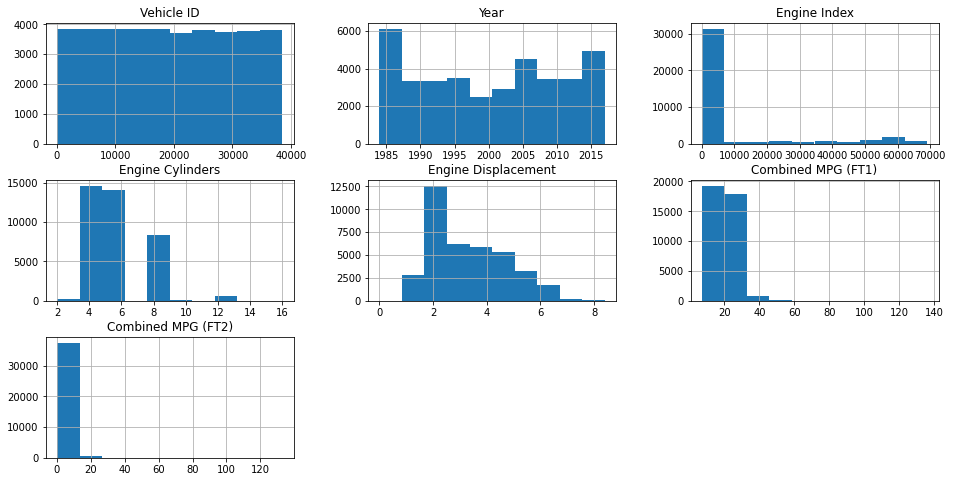

In [49]:
histograms = cars.hist(figsize=(16,8))


### Obervation 1
Most cars have 4 or 6 cylinders. We see a few that have 12 and 10 but the one that has 16 or 2 cylinders is odd.

In [50]:
cars[cars['Engine Cylinders'] > 10]['Make'].unique()

array(['Jaguar', 'Lamborghini', 'Ferrari', 'BMW', 'J.K. Motors',
       'Wallace Environmental', 'Mercedes-Benz', 'Vector', 'Rolls-Royce',
       'Aston Martin', 'Bentley', 'Maybach', 'Volkswagen', 'Audi',
       'Bugatti', 'Pagani'], dtype=object)

In [51]:
cars[(cars['Make'] == 'Wallace Environmental')&(cars['Engine Cylinders'] > 10)][['Model', 'Engine Cylinders', 'Class']]

,Model,Engine Cylinders,Class
10606,Wetl 412,12.0,Compact Cars
10614,Wetl Testarossa,12.0,Two Seaters
11726,Wetl 412,12.0,Compact Cars
11732,Wetl 600 SEL,12.0,Large Cars
11733,Wetl 850I,12.0,Subcompact Cars
11734,Wetl 850I,12.0,Subcompact Cars
11735,Wetl Testarossa,12.0,Two Seaters


In [52]:
cars[cars['Engine Cylinders'] <=2 ]['Make'].unique()

array(['Mazda', 'BMW'], dtype=object)

In [53]:
cars[(cars['Make'] == 'Mazda')&(cars['Engine Cylinders'] <= 2)][['Model', 'Engine Cylinders', 'Class']].head()

,Model,Engine Cylinders,Class
1212,RX-7,2.0,Two Seaters
1213,RX-7,2.0,Two Seaters
1214,RX-7,2.0,Two Seaters
1215,RX-7,2.0,Two Seaters
1216,RX-7,2.0,Two Seaters


In [54]:
cars[(cars['Make'] == 'Mazda')&(cars['Engine Cylinders'] <= 2)][['Model', 'Engine Cylinders', 'Class']].tail()

,Model,Engine Cylinders,Class
28149,RX-8,2.0,Subcompact Cars
29288,RX-8,2.0,Subcompact Cars
29289,RX-8,2.0,Subcompact Cars
30442,RX-8,2.0,Subcompact Cars
30443,RX-8,2.0,Subcompact Cars


Everthing seems to check out!

### Obervation 2
So most cars are small cars so it makes sense the displacement distribution tends to the left. It is also not weird that there are some large cars in the dataset. Not sure if a displacement of 8 is unusual but a displacement of 0 is unusual.

In [55]:
cars[cars['Engine Displacement']==0]

,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,Engine Cylinders,Engine Displacement,Turbocharger,Supercharger,Fuel Type,Fuel Type 1,Fuel Type 2,Combined MPG (FT1),Combined MPG (FT2)
36578,36023,2016,Mitsubishi,i-MiEV,Subcompact Cars,Rear-Wheel Drive,Automatic (A1),NaN,141,NaN,NaN,0.0,NaN,NaN,Electricity,Electricity,NaN,112,0


Of course cars with 0 engine displacement  are electric!

In [71]:
cars[cars['Engine Displacement']==8][['Make', 'Model', 'Engine Cylinders', 'Class']].head(3)

,Make,Model,Engine Cylinders,Class
10939,Dodge,Viper,10.0,Two Seaters
12029,Dodge,Viper,10.0,Two Seaters
13103,Dodge,Viper,10.0,Two Seaters


In [72]:
cars[cars['Engine Displacement']==8][['Make', 'Model', 'Engine Cylinders', 'Class']].tail(3)

,Make,Model,Engine Cylinders,Class
32163,Bugatti,Veyron,16.0,Two Seaters
33333,Bugatti,Veyron,16.0,Two Seaters
34565,Bugatti,Veyron,16.0,Two Seaters


This makes sense that these type of cars would have large displacements and large cylinders

### Observation 3
There are some MPG the over 100 so we need to check that out


In [58]:
cars[cars['Combined MPG (FT1)']>120]["Fuel Type"].unique()

array(['Electricity'], dtype=object)

Makes sense these are all electric cars. It might be worth removing all electric cars because there is obviously no relationship between MPG and the other variables for this type of car (if that is what we're trying to predict).

### Missing Values

In [59]:
not_missing_drive = cars['Drive'].notnull()
not_missing_drive.sum()

36924

In [60]:
cars['Turbocharger'] = cars['Turbocharger'].fillna('No')
cars['Supercharger'] = cars['Supercharger'].fillna('No')

### Outliers

Note that we examined all relevant numerical values except the combined MPG, which has a cleaer set of outliers. We will take this section to figure out how we will deal with the outliers.

<AxesSubplot:ylabel='Frequency'>

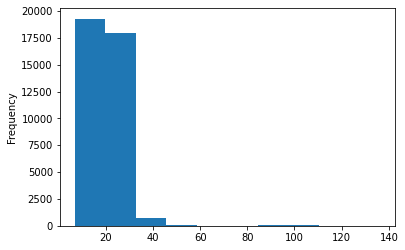

In [73]:
cars['Combined MPG (FT1)'].plot.hist()

In [76]:
cars[cars['Combined MPG (FT1)']>=60]["Fuel Type"].unique()

array(['Electricity'], dtype=object)

In [81]:
cars[cars['Combined MPG (FT1)']<=10]["Fuel Type"].unique()

array(['Regular', 'Premium', 'Gasoline or natural gas', 'CNG'],
      dtype=object)

In [80]:
cars[cars['Combined MPG (FT1)']<=10]["Class"].unique()

array(['Subcompact Cars', 'Large Cars', 'Special Purpose Vehicle 4WD',
       'Vans, Passenger Type', 'Special Purpose Vehicles',
       'Standard Pickup Trucks 4WD', 'Vans, Cargo Type',
       'Standard Pickup Trucks 2WD', 'Midsize Cars', 'Compact Cars',
       'Special Purpose Vehicle 2WD', 'Vans', 'Standard Pickup Trucks',
       'Two Seaters'], dtype=object)

So we see the outliers correspond to electric cars so it's safe to remove these value.

In [83]:
mpg_outlier = cars['Combined MPG (FT1)'] >= 60
mpg_outlier.sum()

119

In [82]:
no_mpg_outlier = cars['Combined MPG (FT1)'] < 60
no_mpg_outlier.sum()

37994

### Final Cleaned Dataset

In [84]:
no_electric_cars = cars['Fuel Type'] != 'Electricity'

cars_cleaned = cars[(not_missing_drive) & (no_mpg_outlier)]
cars_cleaned = cars_cleaned[['Class', 'Drive', 'Engine Cylinders', 
                             'Engine Displacement', 'Turbocharger','Supercharger', 
                             'Fuel Type', 'Combined MPG (FT1)']]

cars_cleaned.shape

(36810, 8)

## Relationship Analysis

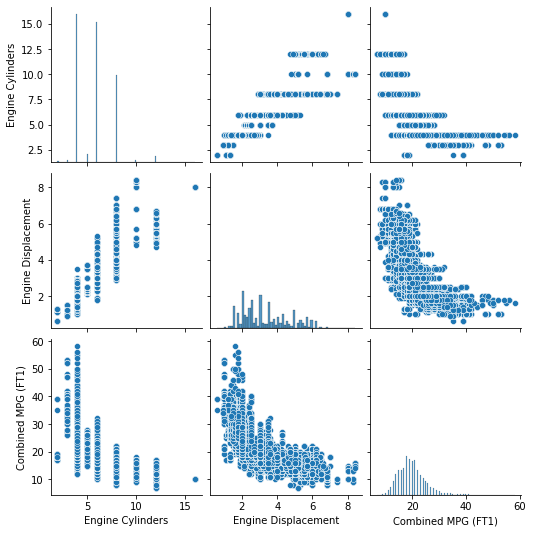

In [92]:
sns.pairplot(cars_cleaned)
plt.show()

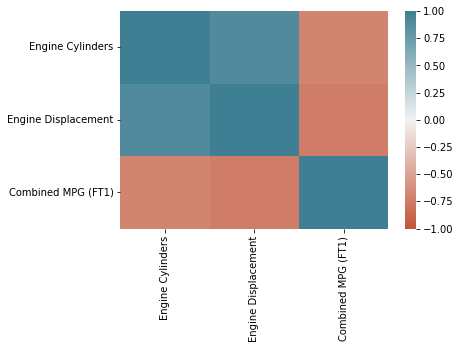

In [90]:
sns.heatmap(cars_cleaned.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))
plt.show()

We can see a number of things here:

- Pairplot shows the distribution on the diagonal and scatterplots on the off-diagonals
- There is a relationship between engine displacement and number of cylinders which makes sense
- The number of cylinders is actually a categorical value
- There is relationship between displacement and mpg but there is also a lot of noise
- This relationship is even weaker between cylinders and mpg, possibly because it's not a numerical value

### Boxplots

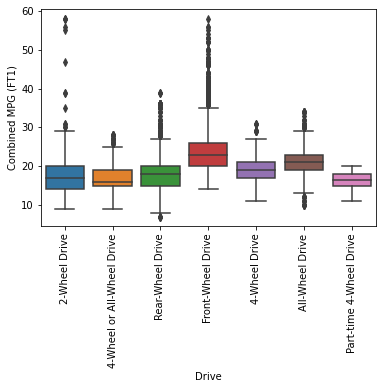

In [98]:
sns.boxplot(x='Drive', y='Combined MPG (FT1)', data=cars_cleaned)
plt.xticks(rotation=90)
plt.show()

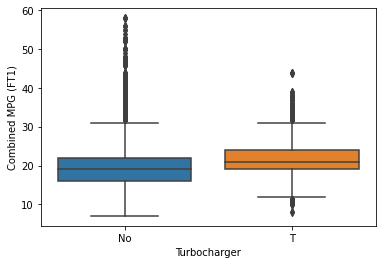

In [101]:
sns.boxplot(x='Turbocharger', y='Combined MPG (FT1)', data=cars_cleaned)
plt.show()

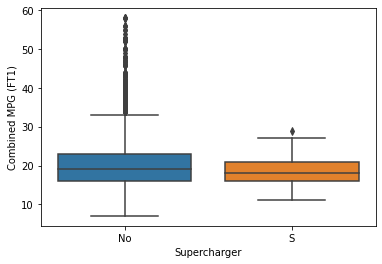

In [95]:
sns.boxplot(x='Supercharger', y='Combined MPG (FT1)', data=cars_cleaned)
plt.show()

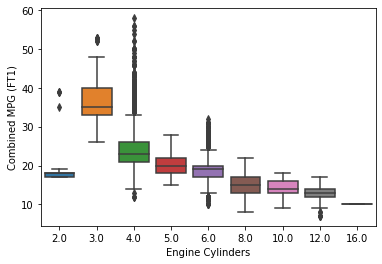

In [96]:
sns.boxplot(x='Engine Cylinders', y='Combined MPG (FT1)', data=cars_cleaned)
plt.show()

## Feature Engineering

### Categorical Features

Note that the class feature name includes the different types of drivetrains so we will seperate the two so class features have less categories which will help with learning the data.

In [103]:
cars_cleaned[['Class', 'Drive']].head()

,Class,Drive
4,Special Purpose Vehicle 2WD,2-Wheel Drive
5,Special Purpose Vehicle 2WD,2-Wheel Drive
6,Special Purpose Vehicle 2WD,2-Wheel Drive
7,Special Purpose Vehicle 2WD,2-Wheel Drive
8,Special Purpose Vehicle 4WD,4-Wheel or All-Wheel Drive
